# Lab 2

## Task tests
this is from the document and achieving the same results


In [1]:
from circle import Circle
from rectangle import Rectangle

circle1 = Circle(x=0, y=0, radius=1) # unit circle
circle2 = Circle(x=1, y=1, radius=1)
rectangle = Rectangle(x=0, y=0, width=1, height=1)
print(circle1 == circle2) # True
print(circle2 == rectangle) # False
circle1.translate(5, 3) # moves its center 5 points in x and 3 points in 
print(circle1)
circle3 = Circle(radius=3) # a circle with center 0,0 with radius 3
circle3 >= circle1 # True

True
False
A circle that is located at (x = 5 y = 3) it has a perimeter of 6.283185307179586 and an area of 3.141592653589793)


True

In [2]:
try:
    rectangle2 = Rectangle(width=3, height="5") 
except TypeError as err:
    print(err)

value must be number not <class 'str'>


In [3]:
try: 
    circle1.translate("THREE", 5) # raise TypeError with an appropriate message
except TypeError as err:
    print(err)

value must be number not <class 'str'>


## Shape testing

In [4]:
from circle import Circle
from rectangle import Rectangle
from shape import Shape
import utils as utl

shape1 = Shape(0,0)
shape2 = Shape(0,0)
shape3 = Shape(1,0)
circle1 = Circle(0,0,1)
rectangle1 = Rectangle(0,0,4,6)

print(f"{shape1 == shape2 = }") # True
print(f"{shape1 < shape2 = }") # False
print(f"{shape2 == shape3 = }") # False
print(f"{circle1 == shape1 = }") # False
print(f"{circle1 > shape1 = }") # True
print(f"{rectangle1 > circle1 = }") # True
print(f"{rectangle1 > shape3 = }") # True

shape1 == shape2 = True
shape1 < shape2 = False
shape2 == shape3 = True
circle1 == shape1 = False
circle1 > shape1 = True
rectangle1 > circle1 = True
rectangle1 > shape3 = True


## Cricle testing


In [5]:
from circle import Circle
from rectangle import Rectangle
from sphere import Sphere

circle1 = Circle(0, 1, 2)
sphere1 = Sphere(0, 1, 2)
circle2 = Circle(0 , 0, 6)
circle3 = Circle(0,0,1)
rectangle1 = Rectangle(2,3,5,7)
print(f"{circle1.area = } , {circle1.perimeter = }")
print(f"{circle2.area = } , {circle2.perimeter = }")
rectangle1 > circle1 , circle1 == sphere1, circle3.is_unit_circle(), circle1.is_unit_circle()

circle1.area = 12.566370614359172 , circle1.perimeter = 12.566370614359172
circle2.area = 113.09733552923255 , circle2.perimeter = 37.69911184307752


(True, False, True, False)

In [6]:
print(circle1)
circle1

A circle that is located at (x = 0 y = 1) it has a perimeter of 12.566370614359172 and an area of 12.566370614359172)


Circle (x=0, y=1, radius=2, perimeter=12.566370614359172, area=12.566370614359172

In [7]:
circle1 = Circle(0,0,1)
circle2 = Circle(0,0,1)
print (circle1)
circle3 = Circle(2,2,2)
circle4 = Circle(2,2,5)
circle1 == circle2, circle3 == circle4

A circle that is located at (x = 0 y = 0) it has a perimeter of 6.283185307179586 and an area of 3.141592653589793)


(True, False)

In [8]:
circle1 > circle2, circle1 >= circle2, circle1 < circle3, circle3 < circle1

(False, True, True, False)

## Rectangle testing


In [9]:
from rectangle import Rectangle

rectangle1 = Rectangle(x=2, y=4, height=20, width= 40)
rectangle2 = Rectangle(height=4, width=2)
rectangle3 = Rectangle(2,3,4,2)
rectangle4 = Rectangle(0,0,2,2)
print(rectangle4.is_square()) # True
print(rectangle1)
print(rectangle2)
print(rectangle1>rectangle2) # True
print(rectangle1==rectangle2) # False
print(rectangle2==rectangle3) # True


True
A rectangle located at (x = 2, y = 4) it has a perimeter of 120 and an area of 800
A rectangle located at (x = 0, y = 0) it has a perimeter of 12 and an area of 8
True
False
True


## Plotter

testing plotting a shape

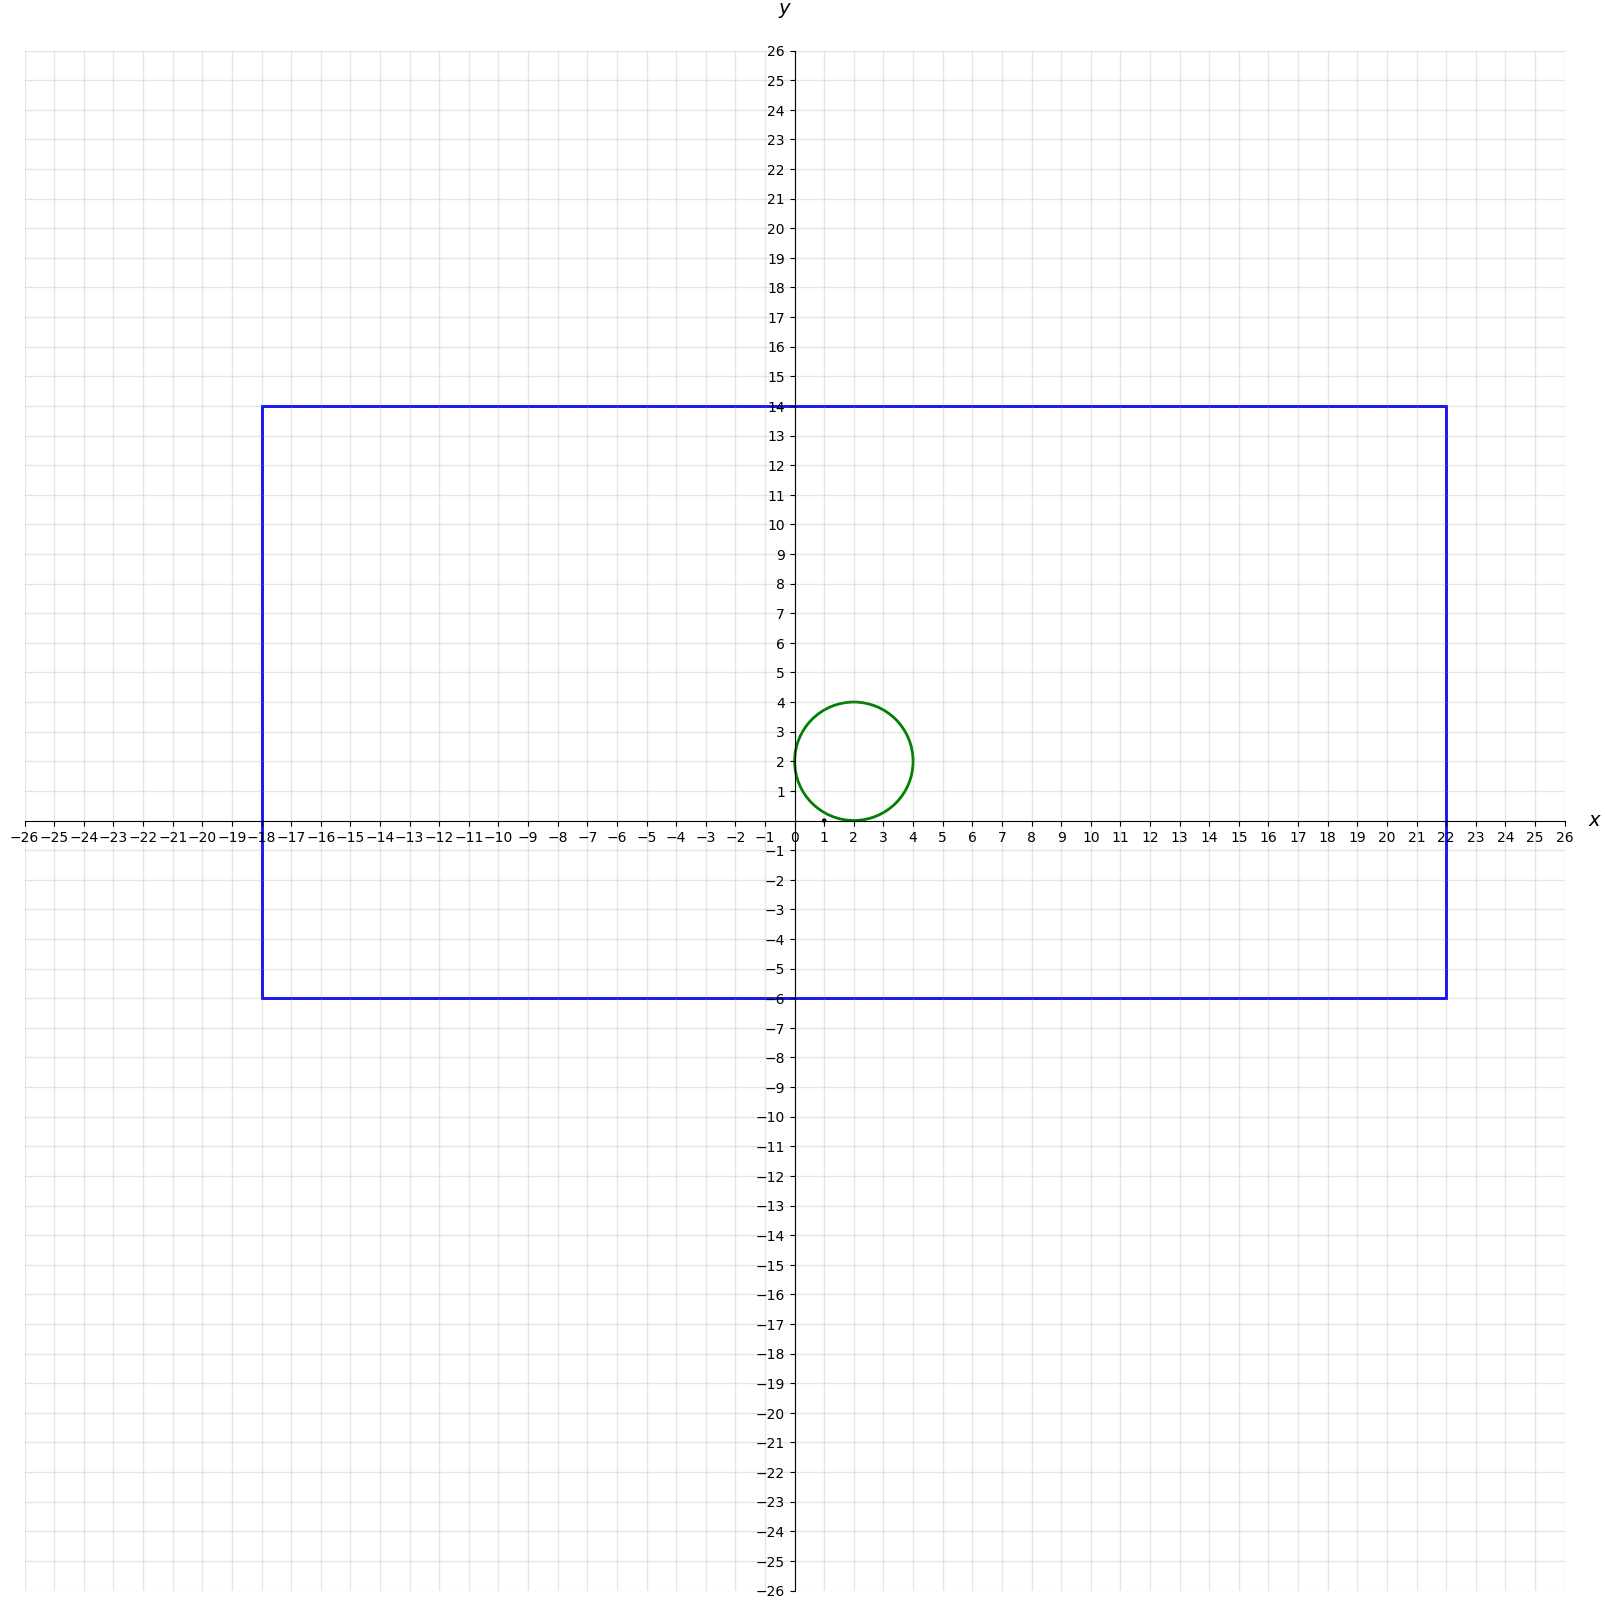

In [10]:
from circle import Circle
from rectangle import Rectangle
from shape2dplotter import Shape2dPlotter

plotter = Shape2dPlotter(shape3, rectangle1, circle3,size=1, auto_plot=True, auto_size=True)

## Shape2dPlotter.plot() Test

not touching size or auto_plot

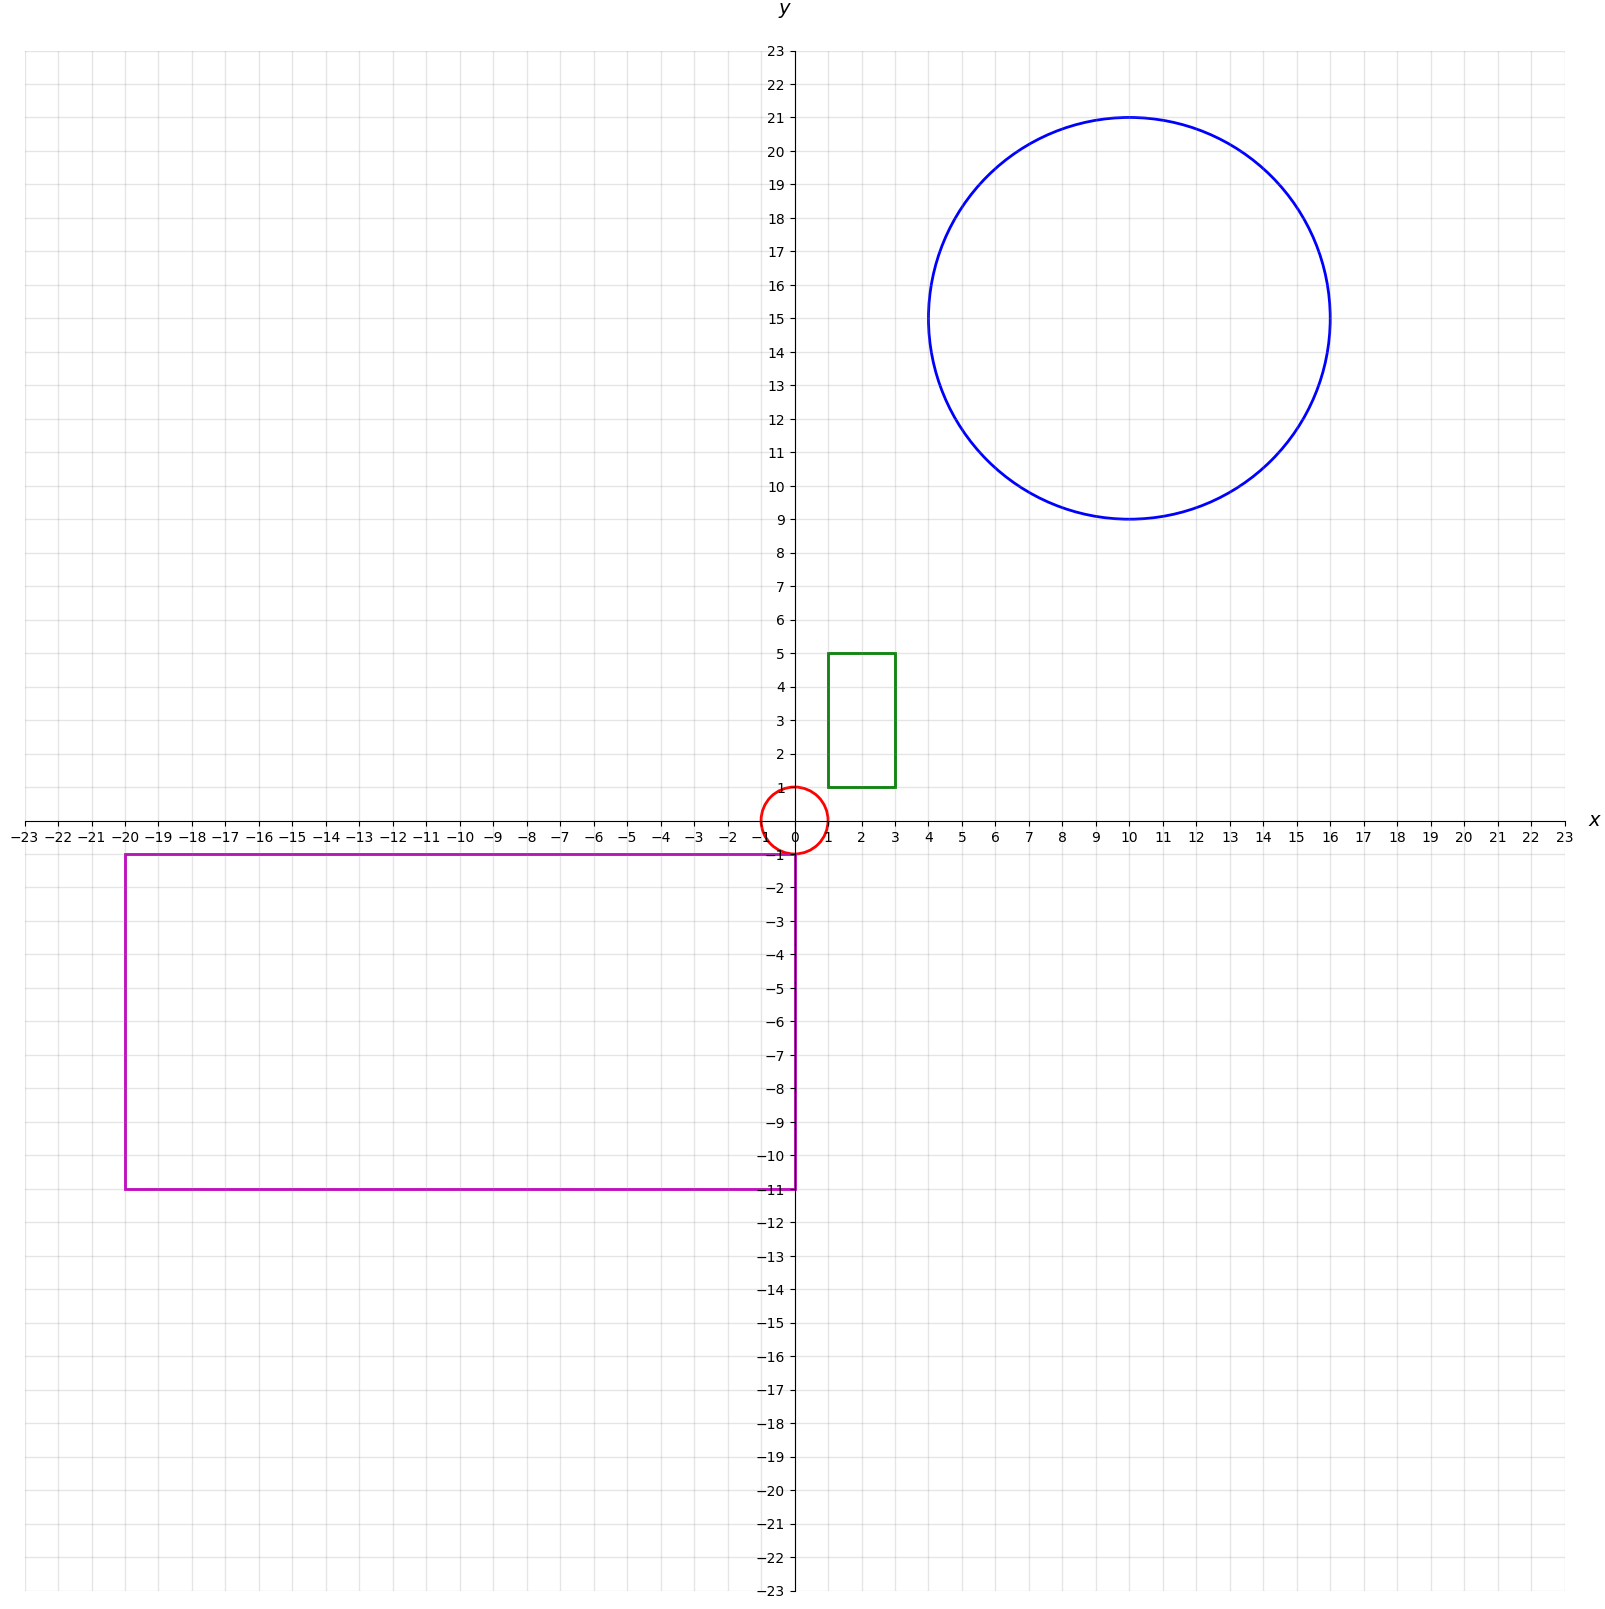

In [11]:
from shape2dplotter import Shape2dPlotter

circle1 = Circle(0,0,1)
circle2 = Circle(10,15,6)
rectangle1 = Rectangle(2,3,4,2)
rectangle2 = Rectangle(-10,-6, 10,20)

plotter = Shape2dPlotter(circle1,circle2,rectangle1,rectangle2)
plotter.plot(30, auto_size=True)

## auto_plot, cube and sphere test

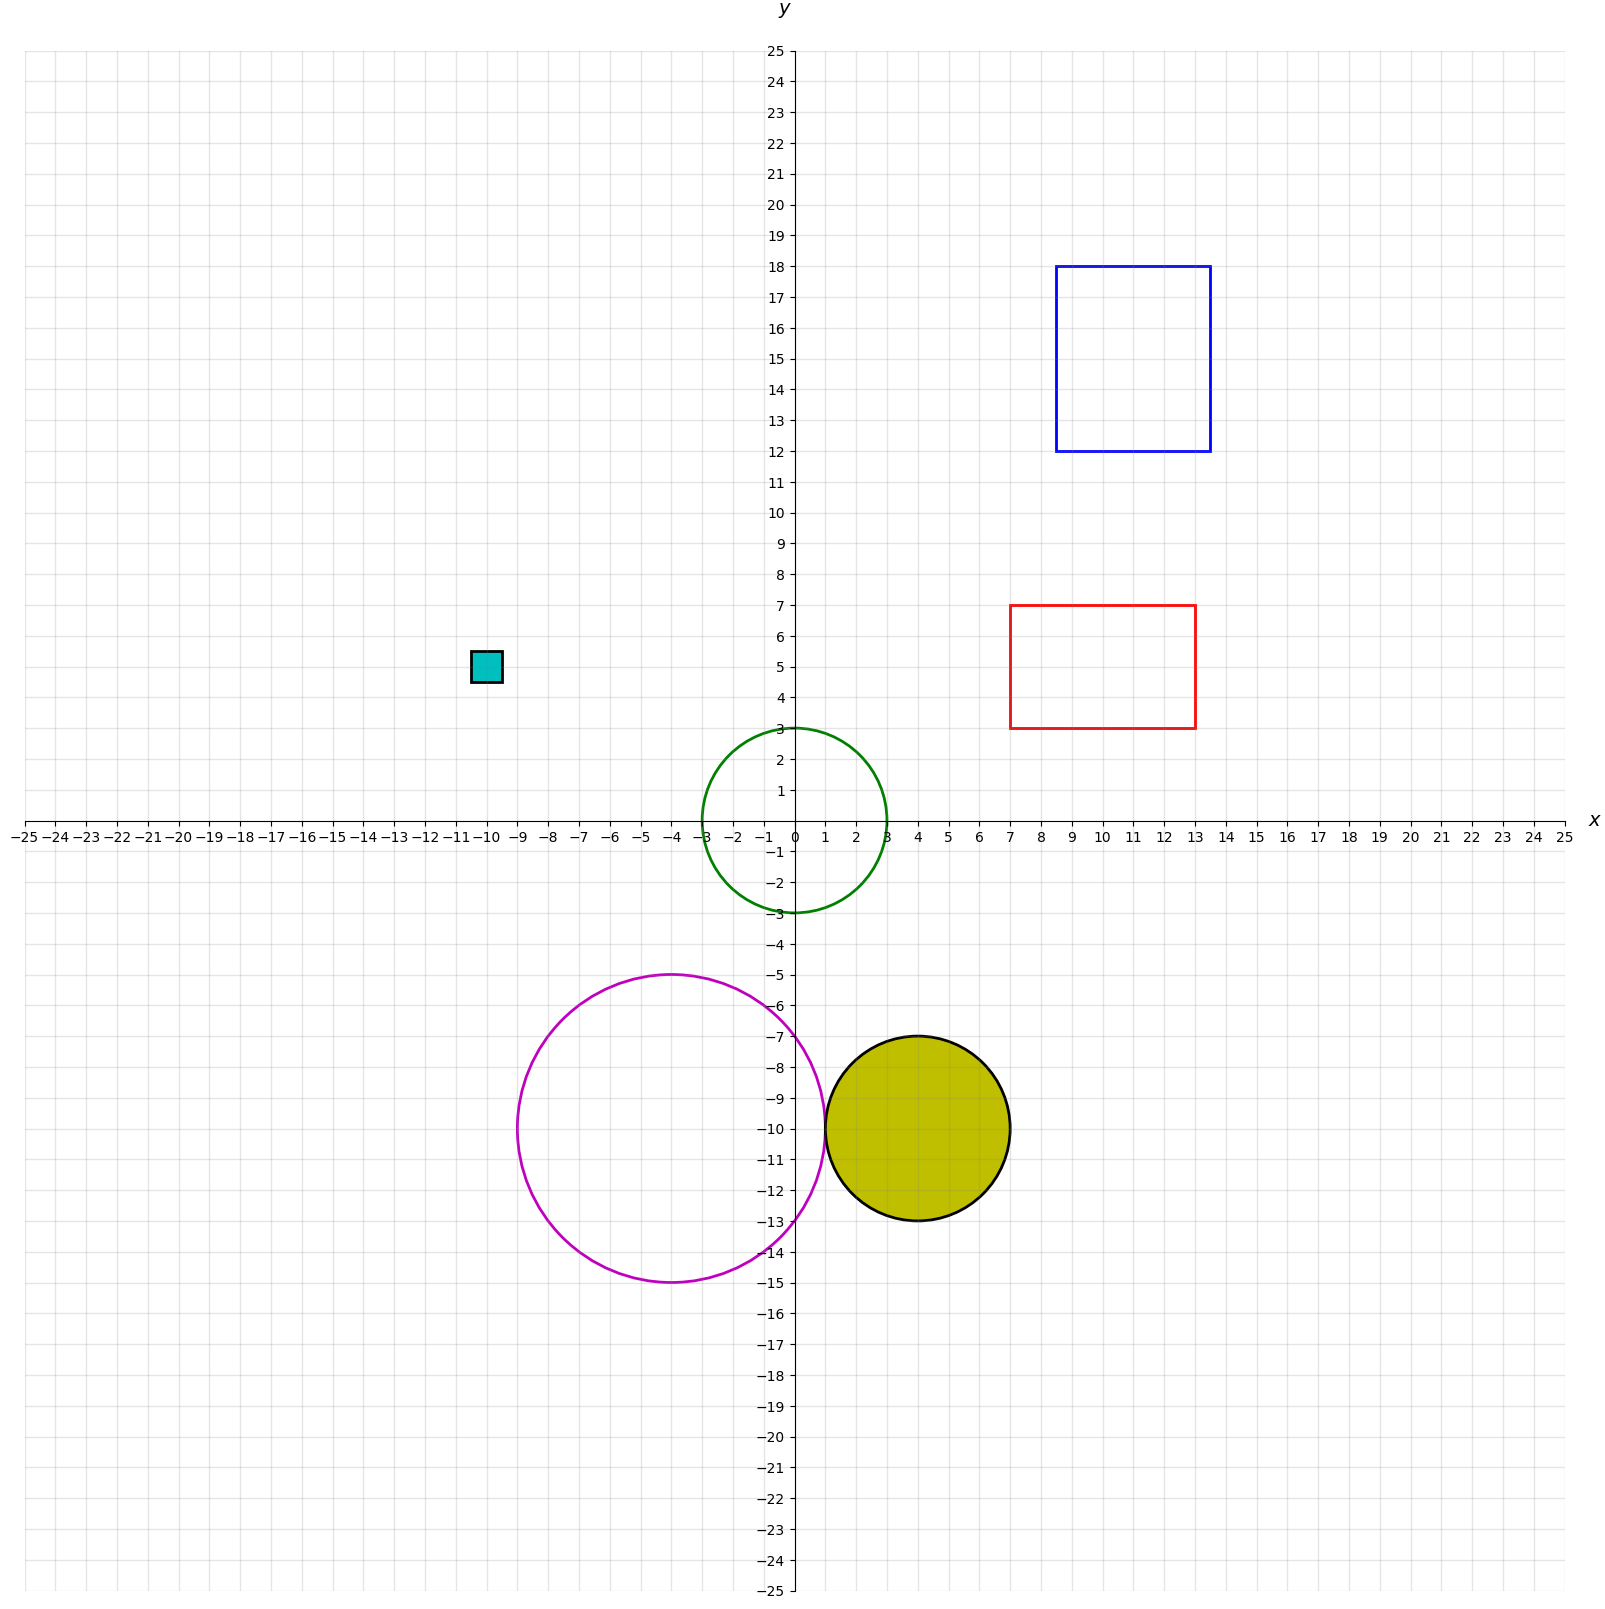

In [12]:
from shape2dplotter import Shape2dPlotter
from rectangle import Rectangle
from circle import Circle
from sphere import Sphere
from cube import Cube

circle1 = Circle(0,0,3)
circle2 = Circle(-4,-10, 5)
sphere1 = Sphere(4,-10,2, 3)
rectangle1 = Rectangle(10, 5, 4, 6)
rectangle2 = Rectangle(11,15, 6 ,5)
cube1 = Cube(-10, 5, 12)

Shape2dPlotter(rectangle1,rectangle2, circle1, circle2, cube1, sphere1, auto_plot=True, size=25, auto_size=False)


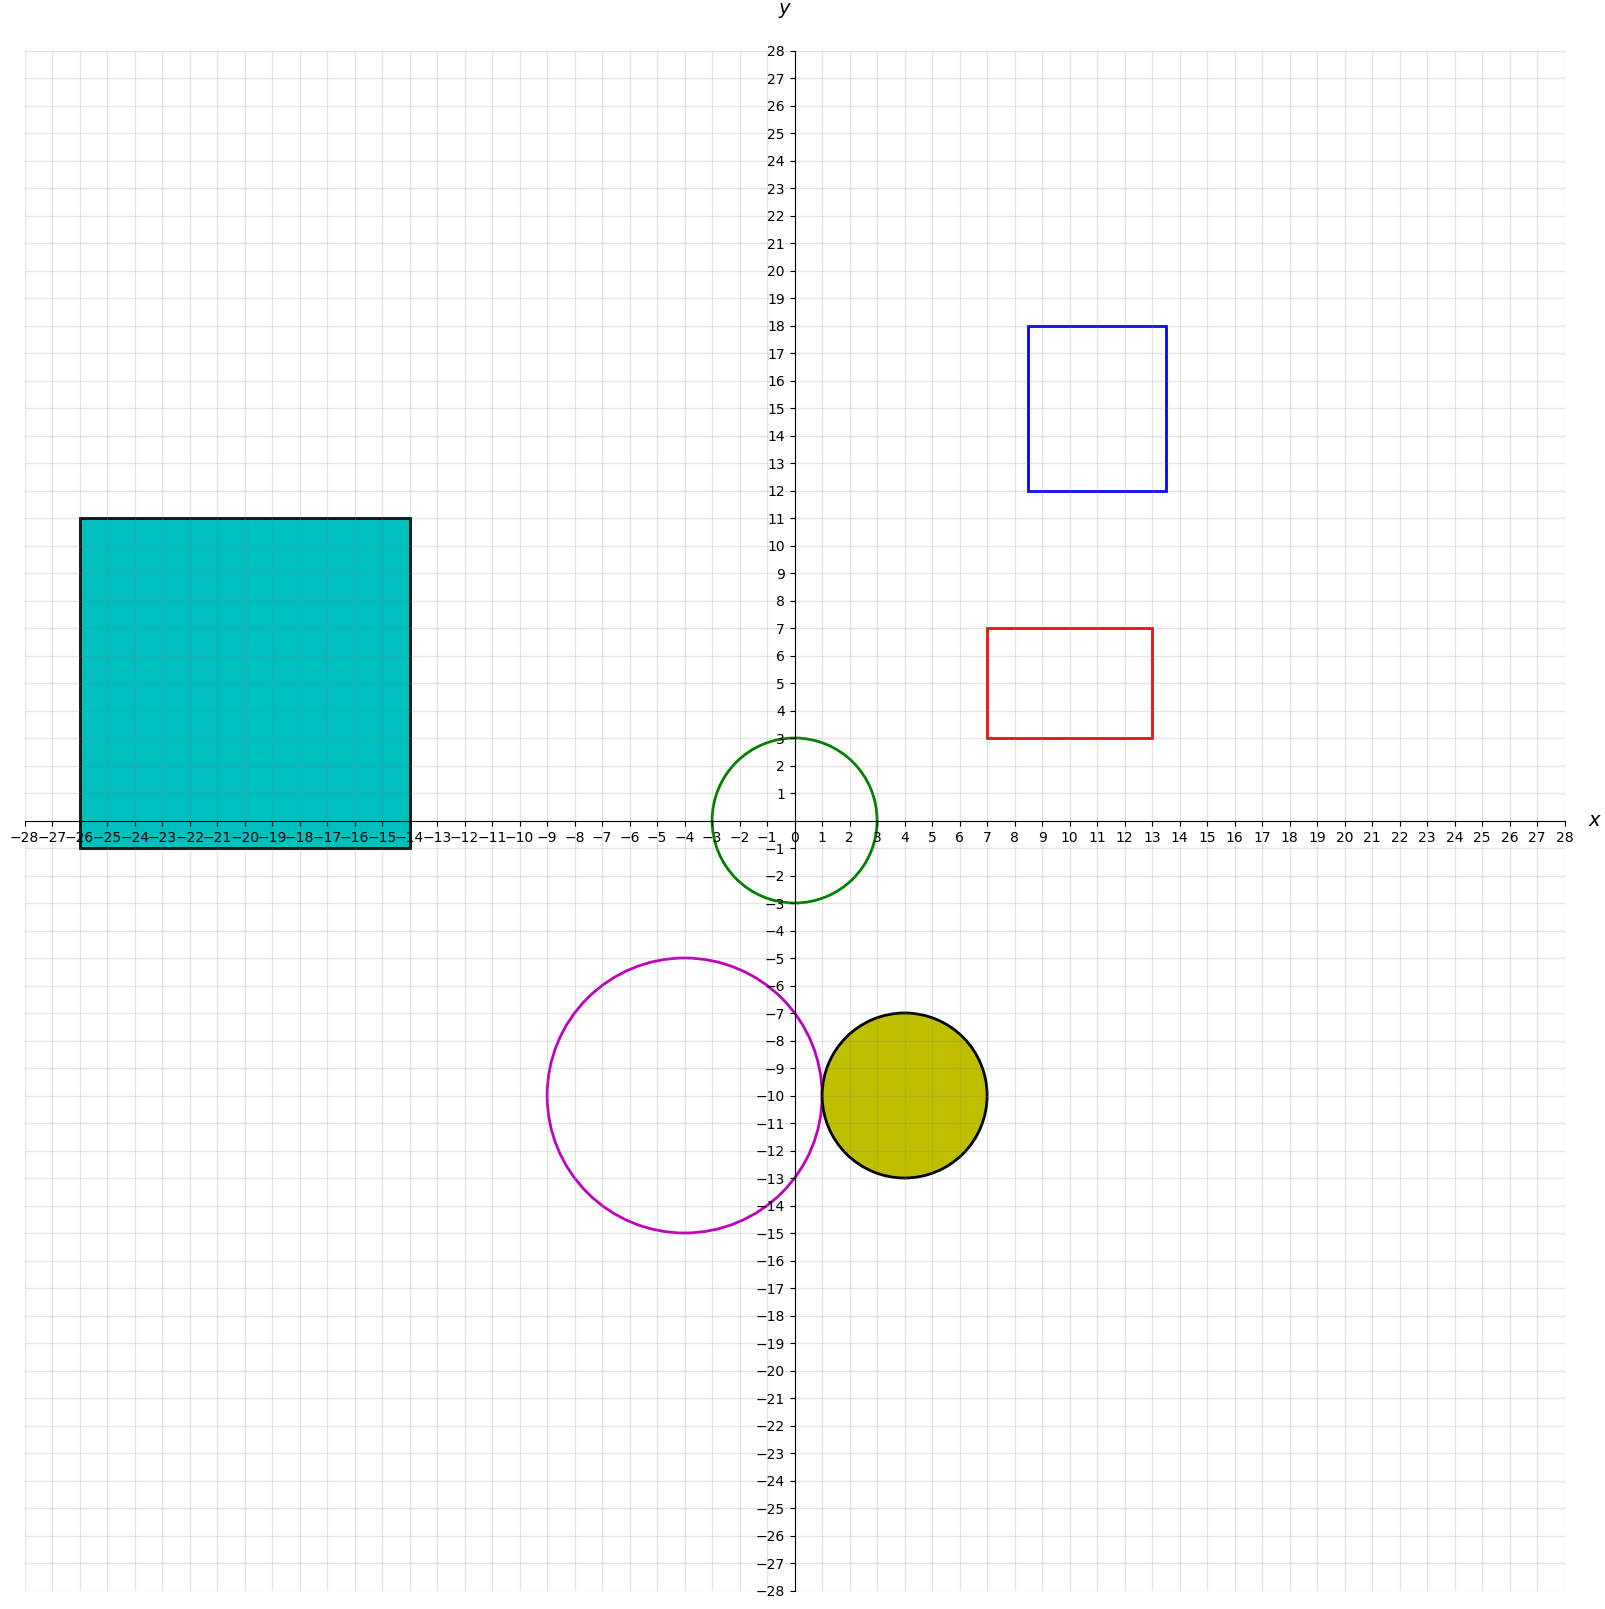

In [13]:
from shape2dplotter import Shape2dPlotter
from rectangle import Rectangle
from circle import Circle
from sphere import Sphere
from cube import Cube

circle1 = Circle(0,0,3)
circle2 = Circle(-4,-10, 5)
sphere1 = Sphere(4,-10, 2, 3)
rectangle1 = Rectangle(10, 5, 4, 6)
rectangle2 = Rectangle(11,15, 6 ,5)
cube1 = Cube(-20, 5, 3, 12)

Shape2dPlotter(rectangle1,rectangle2, circle1, circle2, cube1, sphere1, auto_plot=True, size=15, auto_size=True)


## Cube

#### Manual testing cube

In [14]:
cube1 = Cube(2,3,1,10)
cube2 = Cube(2,4,1,6)
cube2.translate(1,0,2)
print(cube2)
print(cube1)
print(cube1 < cube2) # False
print(cube2 < cube1) # True
cube1


A cube located at (x:3, y:4, z:3) each side is 6 long it has the surface area of 216 and the volume of 216
A cube located at (x:2, y:3, z:1) each side is 10 long it has the surface area of 600 and the volume of 1000
False
True


Cube (x =2,y =3 z =1, size=10, volume=1000, sidearea=100, area=600)

## Sphere

In [15]:
from sphere import Sphere

sphere1 = Sphere(0,0,0,1)
sphere2 = Sphere(2,3,0,8)
print(sphere2)
print(sphere1>sphere2) # Fasle
print(sphere2>sphere1) # True
sphere1.volume , sphere1.area, sphere2.area, sphere2.volume

a sphere located at (x:2, y:3, z:0) that has a radius of 8 it has a surface area of 804.247719318987 and a volume of 2144.660584850632
False
True


(4.1887902047863905, 12.566370614359172, 804.247719318987, 2144.660584850632)

In [16]:
print(sphere1.is_unit_sphere())
sphere1


True


Sphere(x = 0, y = 0, z = 0, radius = 1, volume = 4.1887902047863905, area = 12.566370614359172)